<a href="https://colab.research.google.com/github/CalebaR/MAT-421/blob/main/ModuleE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**3.2: Continunity and Differentiation**\
This section goes through limits, continuity, derivatives and Taylor's Theorem

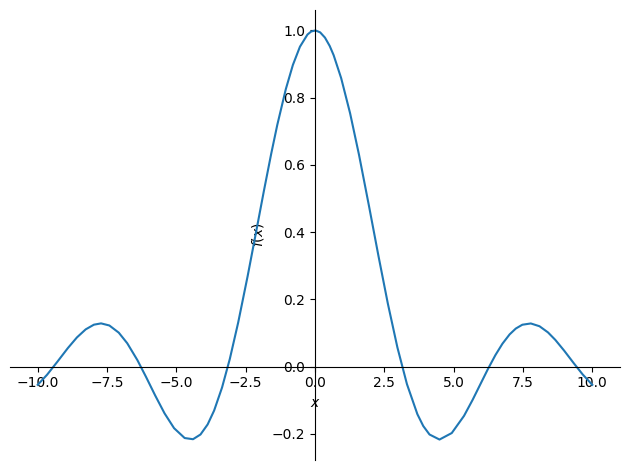

1


0.0470400026866224

In [40]:
#limts

#we can find limits using sympy
from sympy import *

x = symbols('x') #define x as a symbol
expr = sin(x)/x;

# using limit function from sympy
plot(expr)
print(limit(expr, x, 0))
limit(expr,x,3).evalf()

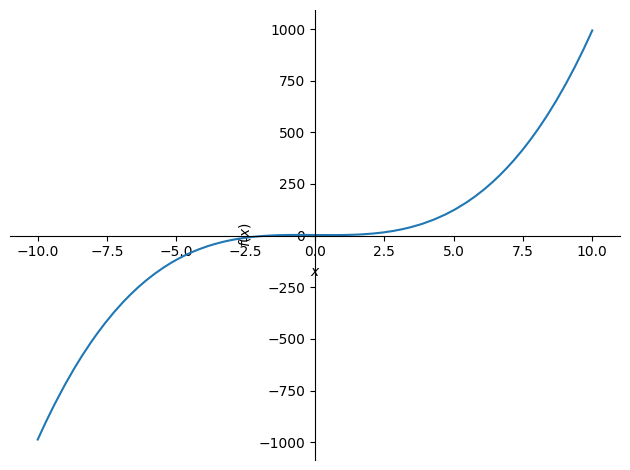

16.1250000000000


-333

In [41]:
#more limits
expr1 = x**3 - x +3;
plot(expr1)
print(limit(expr1,x,2.5))
limit(expr1,x,-7)

In [42]:
#demonstrating continuity. x^3 - x +3 at x = 1

print(limit(expr1,x,1,'-'))
print(limit(expr1,x,1,'+'))
expr1.subs(x,1)
#so the function is continuous at x = 1

3
3


3

In [43]:
#derivatives

pprint(diff(expr,x))
pprint(diff(expr1,x))
diff(expr1,x,2)#second derivative

cos(x)   sin(x)
────── - ──────
  x         2  
           x   
   2    
3⋅x  - 1


6*x

In [44]:
#multivariable differentiation and jacobian
#source: https://stackoverflow.com/questions/48356041/differentiation-of-a-multivariate-function-via-sympy-and-evaluation-at-a-point
def f(u):
    return (u[0]**2 + u[1]**10 + u[2] - 4)**2

u = IndexedBase('u')

print(diff(f(u), u[0]))

4*(u[0]**2 + u[1]**10 + u[2] - 4)*u[0]


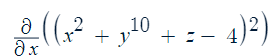
The above code is like this partial derivative

In [45]:
#the jacobian
from autograd import grad
gradient = grad(f)
gradient([1., 1., 1.])

[array(-4.), array(-20.), array(-2.)]

In [55]:
#taylor thereom/series

expr2 = exp(x) #exponential function
n = 10
x0 = 0
r = expr2.subs(x,x0)

for i in range(1,n):
  r += diff(expr2,x,i).subs(x,x0)*(x-x0)**i/factorial(i)

pprint(r)
print(r.subs(x,1).evalf())

expr3 = sin(x) #sin function
n = 10
x0 = 0
r = expr3.subs(x,x0)

for i in range(1,n):
  r += diff(expr3,x,i).subs(x,x0)*(x-x0)**i/factorial(i)

pprint(r)

r.subs(x,1).evalf()

   9        8      7      6     5    4    3    2        
  x        x      x      x     x    x    x    x         
────── + ───── + ──── + ─── + ─── + ── + ── + ── + x + 1
362880   40320   5040   720   120   24   6    2         
2.71828152557319
   9       7      5    3    
  x       x      x    x     
────── - ──── + ─── - ── + x
362880   5040   120   6     


0.841471009700176

**3.3: Unconstrained Optimization**\
This section goes through necessary and suﬀicent conditions of local minimizers, convexity and global minimizers and gradient descent

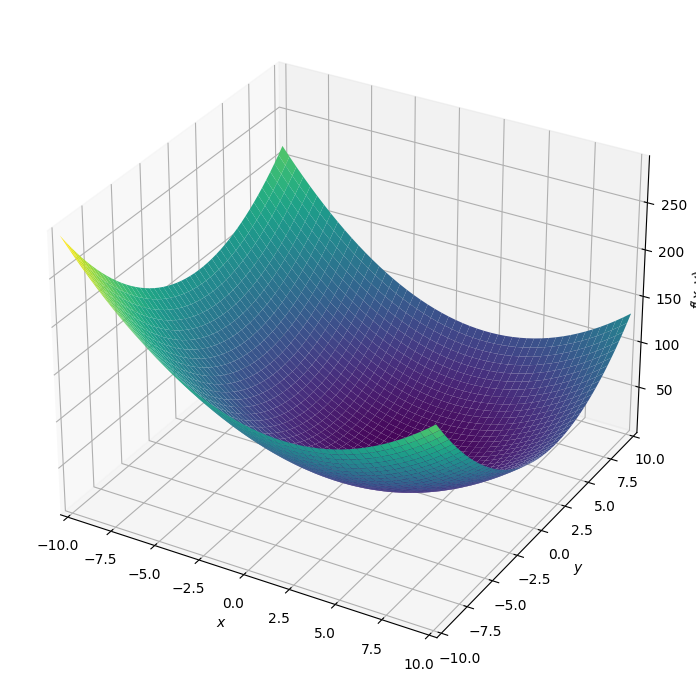

In [94]:
#gradient descent

y=symbols('y')
expr4 = (x-2)**2+(y-2)**2 + 5 #we know minimum is at x=0,y=0
plotting.plot3d(expr4, (x, -10, 10), (y, -10, 10),size=(10,7));


In [93]:
import numpy as np
#source: https://expoundai.wordpress.com/2019/05/04/gradient-descent-optimization-part-2/
f1 = (x-2) ** 2 + (y-2)**2+5
f1x = diff(f1,x)
f1y = diff(f1,y)
x0 = 3
y0 = 3
lr=0.001
xlist = [x0]
ylist = [y0]
for i in range(100):
    # Update the x and y values using the negative gradient values
    x0-=f1x.evalf(subs={x:x0,y:y0})*lr
    y0-=f1y.evalf(subs={x:x0,y:y0})*lr
    # Append to the list to keep track of the points
    xlist.append(x0)
    ylist.append(y0)

xarr = np.array(xlist,dtype='float64')
yarr = np.array(ylist,dtype='float64')
zlist = list(f(xarr,yarr))
print(xarr)
print(zlist)

[3.         2.998      2.996004   2.99401199 2.99202397 2.99003992
 2.98805984 2.98608372 2.98411155 2.98214333 2.98017904 2.97821869
 2.97626225 2.97430972 2.9723611  2.97041638 2.96847555 2.9665386
 2.96460552 2.96267631 2.96075096 2.95882946 2.9569118  2.95499797
 2.95308798 2.9511818  2.94927944 2.94738088 2.94548612 2.94359514
 2.94170795 2.93982454 2.93794489 2.936069   2.93419686 2.93232847
 2.93046381 2.92860288 2.92674568 2.92489219 2.9230424  2.92119632
 2.91935392 2.91751522 2.91568019 2.91384883 2.91202113 2.91019709
 2.90837669 2.90655994 2.90474682 2.90293732 2.90113145 2.89932919
 2.89753053 2.89573547 2.893944   2.89215611 2.8903718  2.88859105
 2.88681387 2.88504024 2.88327016 2.88150362 2.87974061 2.87798113
 2.87622517 2.87447272 2.87272378 2.87097833 2.86923637 2.8674979
 2.8657629  2.86403138 2.86230331 2.86057871 2.85885755 2.85713984
 2.85542556 2.8537147  2.85200727 2.85030326 2.84860265 2.84690545
 2.84521164 2.84352121 2.84183417 2.8401505  2.8384702  2.836793

In [108]:
f1 = x**2+y**2
f1x = diff(f1,x)
f1y = diff(f1,y)
x0 = 0.5
y0 = 0.5
lr=0.01
xlist = [x0]
ylist = [y0]
for i in range(300):
    # Update the x and y values using the negative gradient values
    x0-=f1x.evalf(subs={x:x0,y:y0})*lr
    y0-=f1y.evalf(subs={x:x0,y:y0})*lr
    # Append to the list to keep track of the points
    xlist.append(x0)
    ylist.append(y0)

xarr = np.array(xlist,dtype='float64')
yarr = np.array(ylist,dtype='float64')
zlist = list(f(xarr,yarr))
print(xarr)
print(zlist)

[0.5        0.49       0.4802     0.470596   0.46118408 0.4519604
 0.44292119 0.43406277 0.42538151 0.41687388 0.4085364  0.40036568
 0.39235836 0.38451119 0.37682097 0.36928455 0.36189886 0.35466088
 0.34756767 0.34061631 0.33380399 0.32712791 0.32058535 0.31417364
 0.30789017 0.30173236 0.29569772 0.28978376 0.28398809 0.27830833
 0.27274216 0.26728732 0.26194157 0.25670274 0.25156868 0.24653731
 0.24160656 0.23677443 0.23203894 0.22739817 0.2228502  0.2183932
 0.21402533 0.20974483 0.20554993 0.20143893 0.19741015 0.19346195
 0.18959271 0.18580086 0.18208484 0.17844314 0.17487428 0.17137679
 0.16794926 0.16459027 0.16129847 0.1580725  0.15491105 0.15181283
 0.14877657 0.14580104 0.14288502 0.14002732 0.13722677 0.13448224
 0.13179259 0.12915674 0.12657361 0.12404213 0.12156129 0.11913006
 0.11674746 0.11441251 0.11212426 0.10988178 0.10768414 0.10553046
 0.10341985 0.10135145 0.09932443 0.09733794 0.09539118 0.09348335
 0.09161369 0.08978141 0.08798579 0.08622607 0.08450155 0.082811